# About this project

In this case study, we are data scientists at a real estate company in the city of Rio de Janeiro, Brazil. Our main function as data scientists is to support the demands of the Machine Learning team and the Development team of this company.

To meet this demand, we will analyze a real estate database in the city of Rio de Janeiro that contains different types of properties such as apartments, houses, businesses, among others. On this basis, we will find the rental values ​​of each property, condominium, IPTU and its characteristics such as: number of rooms, suites, parking spaces...

👨🏽‍💻 Access the database by clicking [here](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv).

## Importing the data

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
data = pd.read_csv(url, sep=';')
data.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


For project portfolio purposes, I'm going to change the column names from Portuguese to English

In [2]:
data.columns = ["Type", "Neighborhood", "Bedrooms", "Parking", "Suites", "Area", "Price", "Condominium", "IPTU"]
data.head()

,Type,Neighborhood,Bedrooms,Parking,Suites,Area,Price,Condominium,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [3]:
data.tail()

,Type,Neighborhood,Bedrooms,Parking,Suites,Area,Price,Condominium,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [4]:
type(data)

pandas.core.frame.DataFrame

## General characteristics of the database

In [5]:
data.shape

(32960, 9)

In [6]:
data.columns

Index(['Type', 'Neighborhood', 'Bedrooms', 'Parking', 'Suites', 'Area',
       'Price', 'Condominium', 'IPTU'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          32960 non-null  object 
 1   Neighborhood  32960 non-null  object 
 2   Bedrooms      32960 non-null  int64  
 3   Parking       32960 non-null  int64  
 4   Suites        32960 non-null  int64  
 5   Area          32960 non-null  int64  
 6   Price         32943 non-null  float64
 7   Condominium   28867 non-null  float64
 8   IPTU          22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [8]:
data["Type"]

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Type, Length: 32960, dtype: object

In [9]:
data[["Bedrooms", "Price"]]

,Bedrooms,Price
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


Our database contains 32,960 rows and 9 columns:
- Type: type of property;
- Neighborhood: district of the city of Rio de Janeiro;
- Bedrooms: number of bedrooms;
- Parking: number of garages;
- Suites: rooms with bathroom;
- Area: in square meters;
- Price: monthly value in real;
- Condominium: monthly value of the condominium in reais (added to the monthly value);
- IPTU: Tax on Urban Property and Land (a Brazilian tax that can be paid in cash or in installments).

##  Exploratory analysis
### What is the average rent amount by type of property?

In [10]:
data.head()

,Type,Neighborhood,Bedrooms,Parking,Suites,Area,Price,Condominium,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [11]:
data["Price"].mean()

12952.659715265761

In [12]:
data.groupby("Type").mean(numeric_only=True)

,Bedrooms,Parking,Suites,Area,Price,Condominium,IPTU
Type,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,305.450000,125.846154
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,1935.709677,1707.386740
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,NaN,NaN
Conjunto Comercial/Sala,0.040939,2.516801,0.010858,214.472487,14715.045521,4512.218100,1399.596571
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667


In [13]:
# average rental prices by property type
data.groupby("Type")["Price"].mean()

Type
Apartamento                      4744.614648
Box/Garagem                      1899.756098
Casa                             6793.454922
Casa Comercial                  14478.264151
Casa de Condomínio              11952.061245
Casa de Vila                     1574.369478
Chácara                          4900.000000
Conjunto Comercial/Sala         14715.045521
Flat                             4546.189076
Galpão/Depósito/Armazém         53407.062600
Hotel                           25000.000000
Indústria                      120000.000000
Loft                             2557.882353
Loja Shopping/ Ct Comercial      8126.178862
Loja/Salão                      13769.646770
Loteamento/Condomínio           22000.000000
Pousada/Chalé                    1480.000000
Prédio Inteiro                 498637.239203
Quitinete                        1246.840909
Studio                           2400.000000
Sítio                           12499.000000
Terreno Padrão                  32567.714286
Name:

The visualization of this grouping by type, showing the values, can be improved by transforming this Series into a DataFrame. After this conversion we can sort the "Price" column in ascending order. Rental values will be shown from cheapest to most expensive.

As we can see in the DataFrame below, the properties of the Type 'Quitinete' (Kitchenette) are the ones with the cheapest average prices, followed by 'Pousada/Chalé' (Lodge/Cottage) and 'Casa de Vila' (Village House).

The property type with the highest average rent is 'Prédio Inteiro' (Entire Building), which are types of property usually rented by a large company for their facilities.

In [14]:
data.groupby("Type")[["Price"]].mean().sort_values("Price")

,Price
Type,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


Now let's plot this data into a horizontal bar chart using plot.
On the x-axis we have the average rent values and on the y-axis we have the types of properties.
The average rent values are varying a lot due to the fact that there are residential and commercial properties, which is why the values are so different.

<Axes: ylabel='Type'>

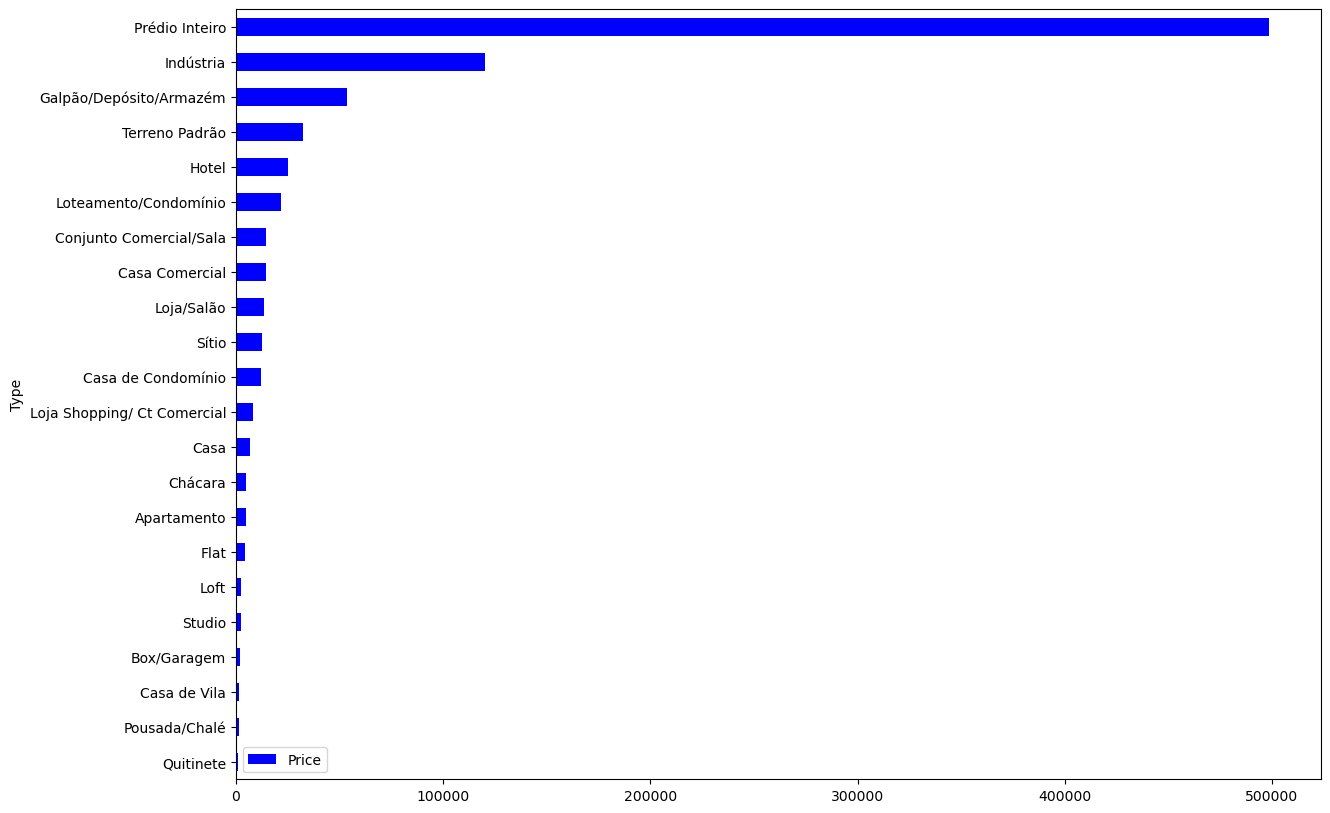

In [15]:
df_price_type = data.groupby("Type")[["Price"]].mean().sort_values("Price")

df_price_type.plot(kind='barh', figsize=(14,10), color='blue')

## Residential Real Estate

At the moment, our interest is in analyzing residential properties, as the company is focused on the segment of customers who are looking for these properties. Let's then analyze what are the unique types of properties that we have in the database. This can be done with the unique method from the Pandas library.

In [16]:
data["Type"].unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [17]:
# creating a list of commercial properties
commercial_real_estate = ['Conjunto Comercial/Sala', 'Prédio Inteiro',
                          'Loja/Salão', 'Galpão/Depósito/Armazém', 'Casa Comercial',
                          'Terreno Padrão', 'Loja Shopping/ Ct Comercial', 'Box/Garagem',
                          'Chácara', 'Loteamento/Condomínio', 'Sítio', 
                          'Pousada/Chalé', 'Hotel', 'Indústria']

The query method allows us to select rows from a DataFrame based on a specific condition. So, let's filter only the types of real estate that are in the 'residential_real_estate' variable.

In [18]:
data.query('@commercial_real_estate in Type') # commercial real estate only

,Type,Neighborhood,Bedrooms,Parking,Suites,Area,Price,Condominium,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [19]:
data.query('@commercial_real_estate not in Type') # only non-commercial real estate

,Type,Neighborhood,Bedrooms,Parking,Suites,Area,Price,Condominium,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [20]:
df = data.query('@commercial_real_estate not in Type')
df.head()

,Type,Neighborhood,Bedrooms,Parking,Suites,Area,Price,Condominium,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [21]:
df["Type"].unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

<Axes: ylabel='Type'>

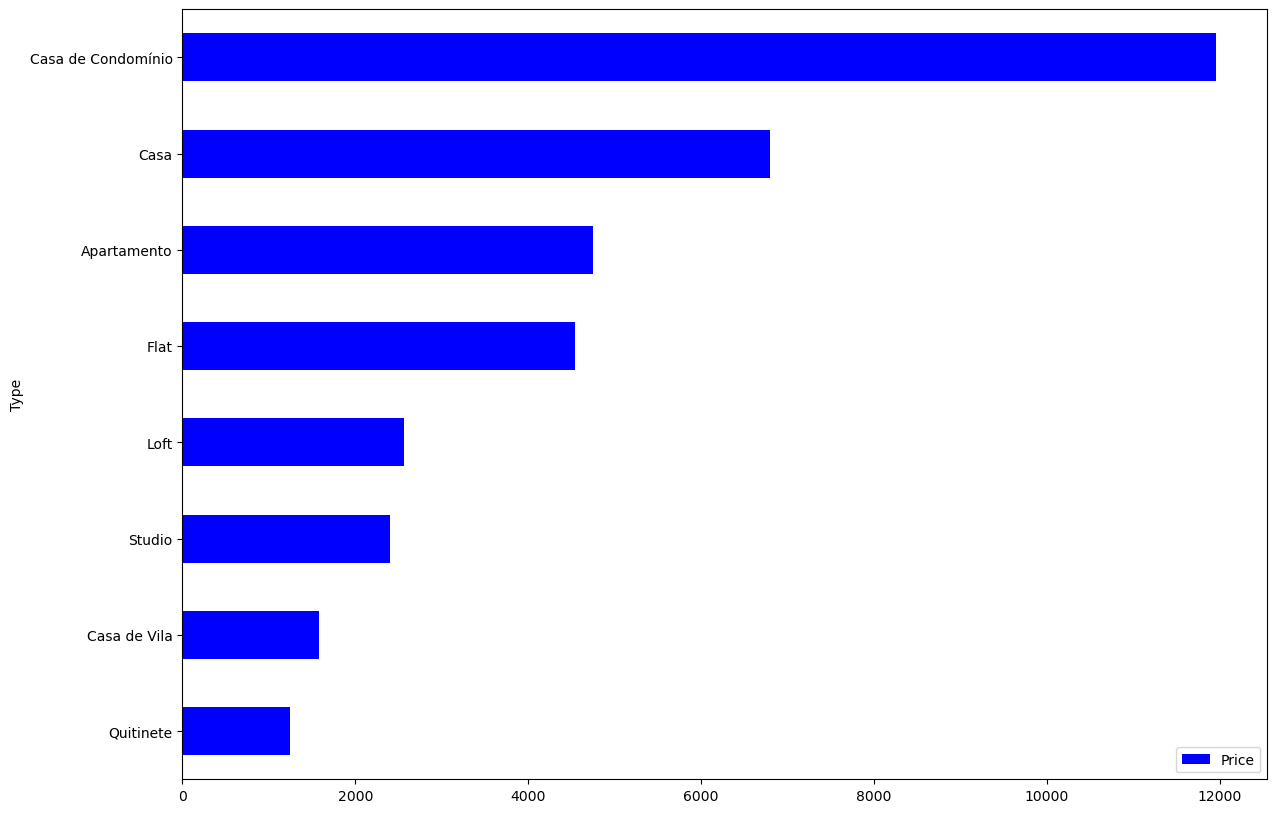

In [22]:
df_price_type = df.groupby("Type")[["Price"]].mean().sort_values("Price")
df_price_type.plot(kind='barh', figsize=(14,10), color='blue')

Now we have a graph with only residential properties and we can see the types of properties ordered from the most expensive average price to the cheapest average price.
Vamos analisar agora o percentual de cada tipo de imóvel da nossa base de dados.

## Percentage of property types

In [23]:
df.head()

,Type,Neighborhood,Bedrooms,Parking,Suites,Area,Price,Condominium,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [24]:
df["Type"].unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)


We can use the value_counts method passing the parameter normalize=True to get a return of the amounts in percentage and still transform the Series into a DataFrame with the to_frame method. At the end, the sort_values method returns the types of properties in ascending order of appearance.

In [25]:
df["Type"].value_counts(normalize=True)

Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: Type, dtype: float64

In [26]:
df["Type"].value_counts(normalize=True).to_frame() # convertendo de Series para DataFrame

,Type
Apartamento,0.845139
Casa de Condomínio,0.043096
Casa,0.041842
Quitinete,0.036173
Flat,0.020596
Casa de Vila,0.010774
Loft,0.002207
Studio,0.000173


In [27]:
df["Type"].value_counts(normalize=True).to_frame().sort_values("Type")

,Type
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


<Axes: xlabel='Type', ylabel='Percentage'>

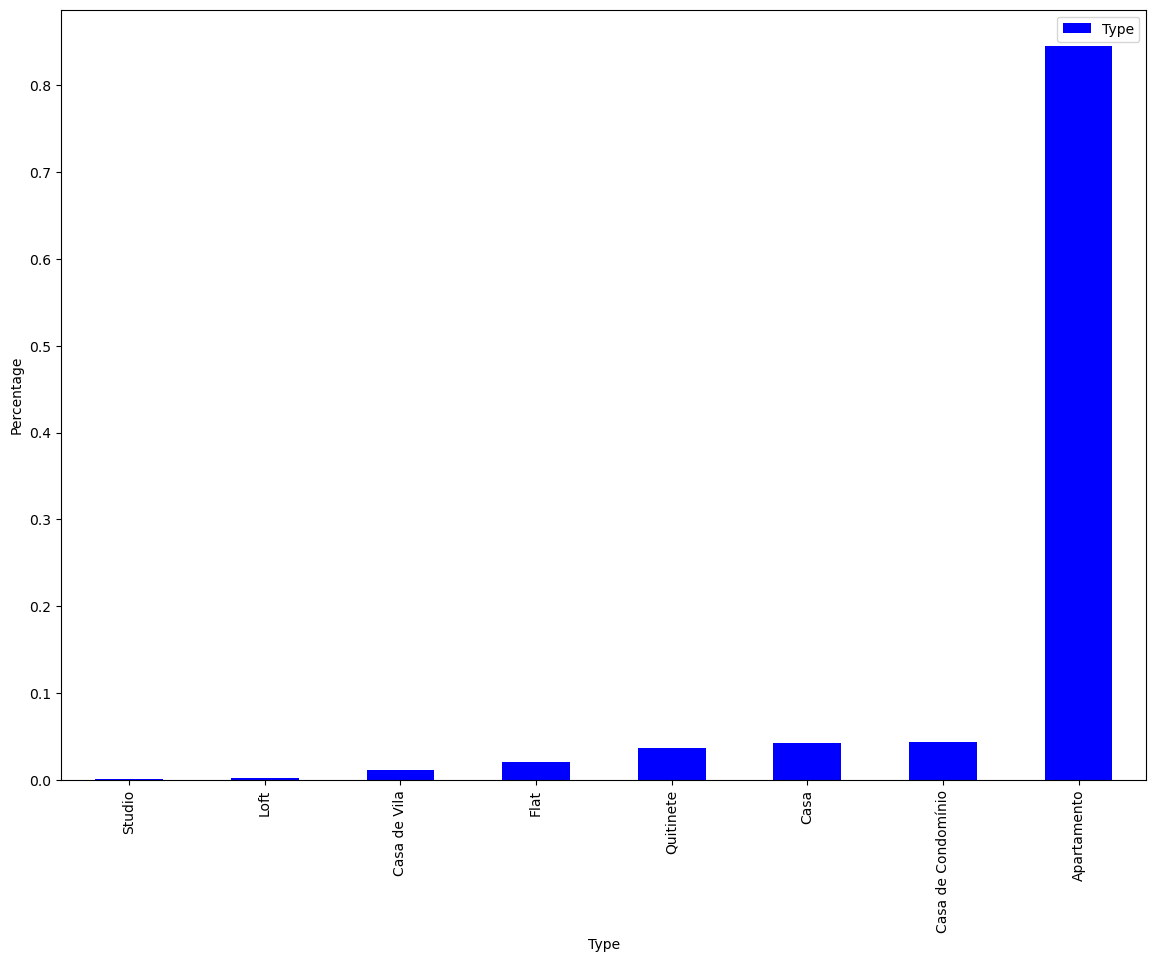

In [28]:
# creating a plot
df_percentage_type = df["Type"].value_counts(normalize=True).to_frame().sort_values("Type")
df_percentage_type.plot(kind="bar", figsize=(14,10), color='blue',
                        xlabel="Type", ylabel="Percentage")

As we can see, apartment-type properties represent more than 80% of residential properties. Looking at this data, it doesn't make much sense to keep the other types of residential properties in our database, it makes much more sense to choose to work with properties of the Apartment type, since they represent a good business opportunity for the real estate company.

But first, let's check the average number of rooms per apartment, check how many unique neighborhoods there are in our database, analyze which neighborhoods have the highest average rent value and create a horizontal bar graph that presents the 5 neighborhoods with the higher average rent values.

In [29]:
df.head()

,Type,Neighborhood,Bedrooms,Parking,Suites,Area,Price,Condominium,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [36]:
# calculating the average of rooms
df["Bedrooms"].mean()

2.4837523257323353

In [37]:
# how many neighborhoods are in the database
len(df["Neighborhood"].unique())

154

In [32]:
df['Neighborhood'].nunique()


154

In [38]:
# analyzing which neighborhoods have the highest average rent value
df.groupby("Neighborhood")[["Price"]].mean().sort_values("Price").tail()

,Price
Neighborhood,
Ipanema,9196.116863
Paquetá,10550.000000
Arpoador,10896.062500
Cidade Jardim,12000.000000
Joá,16773.478261


In [39]:
df_neighborhood = df.groupby("Neighborhood")[["Price"]].mean().sort_values("Price").tail()
df_neighborhood

,Price
Neighborhood,
Ipanema,9196.116863
Paquetá,10550.000000
Arpoador,10896.062500
Cidade Jardim,12000.000000
Joá,16773.478261


<Axes: ylabel='Neighborhood'>

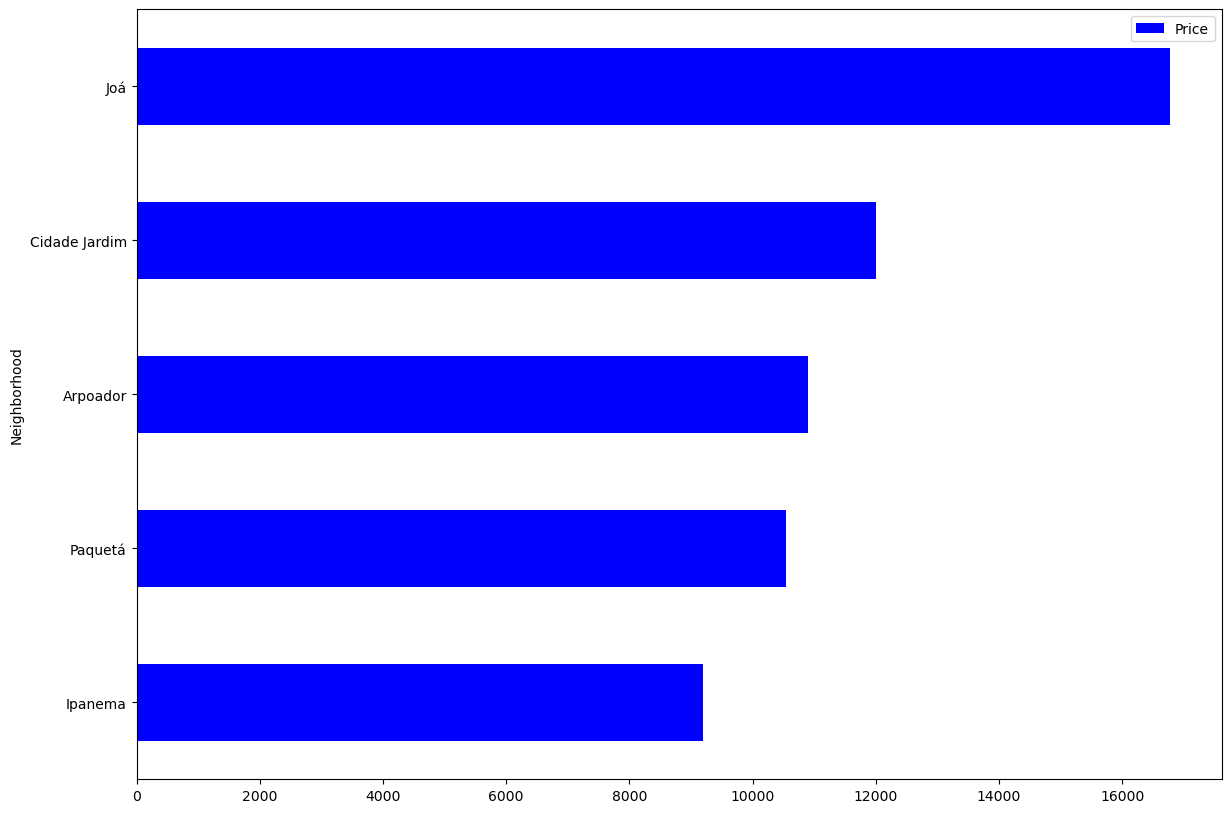

In [35]:
df_neighborhood.plot(kind="barh", figsize=(14,10), color="blue")